In [7]:
import geopandas as gpd
import pandas as pd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from sklearn.preprocessing import normalize
from glob import glob

files = glob('data/xyz/*.xyz')

# 2pi anisotropy
ans_2v = pd.read_csv(files[0], header=None, delim_whitespace=True,
                     names=['Latitude', 'Longitude', 'Azimuth', 'Strength'])
# pi anisotropy
ans_v = pd.read_csv(files[2], header=None, delim_whitespace=True,
                    names=['Latitude', 'Longitude', 'Azimuth', 'Strength'])
# isotropic speed
iso_v = pd.read_csv(files[1], header=None, delim_whitespace=True, names=['Latitude', 'Longitude', 'Strength'])


# gans_2v = gpd.GeoDataFrame(ans_2v, geometry=gpd.points_from_xy(ans_2v.Latitude, ans_2v.Longitude))
# gans_v = gpd.GeoDataFrame(ans_v, geometry=gpd.points_from_xy(ans_v.Latitude, ans_v.Longitude))
# giso_v = gpd.GeoDataFrame(iso_v, geometry=gpd.points_from_xy(iso_v.Latitude, iso_v.Longitude))

# print(giso_v)

def scalar_prepare(df):
    # df.Strength = (df.Strength - df.Strength.min()) / (df.Strength.max() - df.Strength.min())
    Z = df.pivot_table(index='Longitude', columns='Latitude', values='Strength').T.values
    X_unique = np.sort(df.Longitude.unique())  # probably need to flip these?
    Y_unique = np.sort(df.Latitude.unique())
    X, Y = np.meshgrid(X_unique, Y_unique)
    return X, Y, Z


def vector_prepare(df):
    X = df.Longitude.to_numpy()
    Y = df.Latitude.to_numpy()

    df.Strength = df.Strength / df.Strength.max()
    # vector calculation
    U = (df.Strength * df.Azimuth.apply(np.sin)).to_numpy()
    V = (df.Strength * df.Azimuth.apply(np.cos)).to_numpy()

    # normalise
    # U = (U - U.min()) / (U.range())
    return X, Y, U, V


iso_v = scalar_prepare(iso_v)
ans_v = vector_prepare(ans_v)

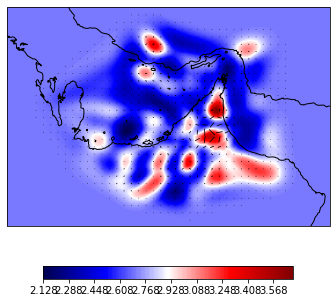

In [10]:
figsize = (10,5)
fig = plt.figure(figsize=figsize)
proj = ccrs.Miller()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Miller())
ax.set_extent((49, 60, 21.5, 28.5))

filled_c = ax.contourf(*iso_v, 200, transform=proj, cmap='seismic')
# line_c = ax.contour(*iso_v, levels=4, colors=['black'],transform=ccrs.Miller())
aniso = ax.quiver(*ans_v, transform=proj, pivot='mid',
                  headlength=0, headaxislength=0,
                  scale=40)

ax.coastlines()
# ax.set_global()


fig.colorbar(filled_c, orientation='horizontal', fraction=0.046)
plt.show()
